In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 
#Importing our defined functions to clean
from clean_data_functions import *
from scipy.stats import mode

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None) 
sns.set_theme(style ="whitegrid")

%matplotlib inline

In [2]:
open_meteo_df_h = pd.read_csv("DATA/open-meteo-hourly-mexico-city_2024-02-01_2024-03-06.csv", skiprows=3)

open_meteo_df_f = pd.read_csv("DATA/open-meteo-hourly-mexico-city_forecast 2024-03-06_2024-03-20.csv", skiprows=3)


In [3]:
open_meteo_df_h.dropna(inplace=True)

In [72]:
weather_df = pd.concat([open_meteo_df_h, open_meteo_df_f], ignore_index=True)

In [5]:
weather_df

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),rain (mm),cloud_cover (%),wind_speed_10m (km/h),is_day ()
0,2024-02-01T00:00,21.3,21.0,18.4,0.0,85.0,3.3,1
1,2024-02-01T01:00,19.5,26.0,15.4,0.0,90.0,13.0,0
2,2024-02-01T02:00,18.6,29.0,16.2,0.0,90.0,2.5,0
3,2024-02-01T03:00,17.0,40.0,13.6,0.0,56.0,12.3,0
4,2024-02-01T04:00,14.8,53.0,12.9,0.0,46.0,5.0,0
...,...,...,...,...,...,...,...,...
1147,2024-03-18T19:00,18.8,31.0,19.6,0.0,26.0,3.3,1
1148,2024-03-18T20:00,20.3,26.0,20.5,0.0,22.0,4.2,1
1149,2024-03-18T21:00,20.4,27.0,19.2,0.0,17.0,6.6,1
1150,2024-03-18T22:00,18.2,38.0,16.2,0.9,45.0,3.3,1


In [73]:
weather_df.duplicated(subset=['time']).sum()

24

In [74]:
weather_noscale= weather_df.drop_duplicates(subset=['time'])
weather_noscale

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),rain (mm),cloud_cover (%),wind_speed_10m (km/h),is_day ()
0,2024-02-01T00:00,21.3,21.0,18.4,0.0,85.0,3.3,1
1,2024-02-01T01:00,19.5,26.0,15.4,0.0,90.0,13.0,0
2,2024-02-01T02:00,18.6,29.0,16.2,0.0,90.0,2.5,0
3,2024-02-01T03:00,17.0,40.0,13.6,0.0,56.0,12.3,0
4,2024-02-01T04:00,14.8,53.0,12.9,0.0,46.0,5.0,0
...,...,...,...,...,...,...,...,...
1147,2024-03-18T19:00,18.8,31.0,19.6,0.0,26.0,3.3,1
1148,2024-03-18T20:00,20.3,26.0,20.5,0.0,22.0,4.2,1
1149,2024-03-18T21:00,20.4,27.0,19.2,0.0,17.0,6.6,1
1150,2024-03-18T22:00,18.2,38.0,16.2,0.9,45.0,3.3,1


In [69]:
import pickle

# Load the saved model from the file
with open('sarimax_model_9.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
# Load the saved scalers and transformers
with open('scaler_9.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# with open('transformer_8.1.pkl', 'rb') as f:
#     loaded_transformer = pickle.load(f)

In [70]:
loaded_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                           rental_counts   No. Observations:                 7603
Model:             SARIMAX(2, 0, 1)x(0, 1, [1, 2], 24)   Log Likelihood              -19052.243
Date:                                 Fri, 08 Mar 2024   AIC                          38130.486
Time:                                         18:49:04   BIC                          38220.617
Sample:                                     01-01-2023   HQIC                         38161.420
                                          - 11-13-2023                                         
Covariance Type:                                   opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
is_business_day       2.4036      0.090     26.774      0.000       2.228       2.580
temperature_C         3.9141      3.556      1.101      0.271      -3.056      10.884
rel_humidity_perc     0.0695      0.713      0.098      0.922      -1.327       1.466
feels_like_temp_C    -1.9385      2.949     -0.657      0.511      -7.718       3.841
rain_mm              -0.1876      0.988     -0.190      0.849      -2.123       1.748
wind_speed_kmh       -0.1315      0.702     -0.187      0.851      -1.508       1.245
is_day               -0.9078      0.713     -1.273      0.203      -2.306       0.490
ar.L1                 0.2661      0.205      1.298      0.194      -0.136       0.668
ar.L2                 0.0301      0.025      1.227      0.220      -0.018       0.078
ma.L1                -0.1700      0.205     -0.829      0.407      -0.572       0.232
ma.S.L24             -0.7376      0.009    -83.352      0.000      -0.755      -0.720
ma.S.L48             -0.1728      0.009    -19.162      0.000      -0.190      -0.155
sigma2                8.5257      0.101     84.404      0.000       8.328       8.724
===================================================================================
Ljung-Box (L1) (Q):                  10.65   Jarque-Bera (JB):              1543.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
def wrangle_open_meteo(open_meteo_df):
    
    weather_columns = {
        'time': 'hour', 
        'temperature_2m_(°c)': 'temperature_C', 
        'relative_humidity_2m_(%)': 'rel_humidity_perc',
        'apparent_temperature_(°c)': 'feels_like_temp_C', 
        'rain_(mm)': 'rain_mm',
       'cloud_cover_(%)': 'cloud_cover_perc', 
        'wind_speed_10m_(km/h)': 'wind_speed_kmh',
        'is_day_()':'is_day'
    }
    open_meteo_df.drop(columns=['cloud_cover (%)'], axis=1, inplace= True) 
    open_meteo_df.columns = [name.strip().replace(" ", "_").lower() for name in open_meteo_df.columns]
    open_meteo_df.rename(columns=weather_columns, inplace=True)
    
    
    # add is_business_day column 

    # Map the hourly_aggregated to a new column indicating business day [1] or weekend/holiday [0]

    # Public holidays in Mexico City:

    public_holidays = [ # month and day
        '01-01', # new year's day
        '02-05', # consistution day
        '03-21', # Benito Juárez's Birthday
        '05-01', # Labour day
        '09-16', # Independence day
        '11-20', # Revolution day
        '12-25', # Christmas
    ]

    # convert public_holidays to datetime format
    public_holidays_dt = [datetime.strptime(holiday, '%m-%d') for holiday in public_holidays]
    open_meteo_df['is_business_day'] = pd.to_datetime(open_meteo_df['hour']).apply(
        lambda x: 1 if (x.month, x.day) not in [(holiday.month, holiday.day) for holiday in public_holidays_dt] and (x.weekday() < 5) else 0
        )
    
    # reformat the hour column to match our aggregated ecobici df and set as index
    open_meteo_df['hour'] = pd.to_datetime(open_meteo_df['hour'], format='%Y-%m-%dT%H:%M')
    open_meteo_df.set_index('hour', inplace=True)

    

    return open_meteo_df



In [77]:
exogenous = wrangle_open_meteo(weather_noscale)

KeyError: "['cloud_cover (%)'] not found in axis"

In [84]:
exogenous.head(2)

,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,wind_speed_kmh,is_day
hour,,,,,,,
2024-02-01 00:00:00,1,21.3,21.0,18.4,0.0,3.3,1
2024-02-01 01:00:00,1,19.5,26.0,15.4,0.0,13.0,0


In [54]:
#exogenous.drop('rel_humidity_perc', axis=1, inplace=True)

In [79]:
# reorder columns to match at time of fit

# order of columns at fit:
# Index(['is_business_day', 'temperature_C',
#       'rel_humidity_perc', 'feels_like_temp_C', 'rain_mm', 'wind_speed_kmh',
#        'is_day'],
#       dtype='object')

exogenous = exogenous[['is_business_day', 'temperature_C', 'rel_humidity_perc',
                                   'feels_like_temp_C', 'rain_mm', 'wind_speed_kmh', 'is_day']]

In [95]:
column_names = ['is_business_day', 'temperature_C', 'rel_humidity_perc',
                                   'feels_like_temp_C', 'rain_mm', 'wind_speed_kmh', 'is_day']

exogenous = pd.DataFrame(exogenous, columns=column_names)

In [97]:
index = pd.date_range(start='2024-02-01 00:00:00', end='2024-03-18 23:00:00', freq='H')

exogenous['date'] = index
exogenous.set_index('date', inplace=True)

In [14]:
## #'is_business_day', 'temperature_C', 'rel_humidity_perc',
#        'feels_like_temp_C', 'rain_mm', 'wind_speed_kmh', 'is_day'

In [98]:
exogenous_scaled = loaded_scaler.transform(exogenous)
exogenous_scaled

array([[1.        , 0.59354839, 0.18556701, ..., 0.        , 0.08571429,
        1.        ],
       [1.        , 0.53548387, 0.2371134 , ..., 0.        , 0.33766234,
        0.        ],
       [1.        , 0.50645161, 0.26804124, ..., 0.        , 0.06493506,
        0.        ],
       ...,
       [1.        , 0.56451613, 0.24742268, ..., 0.        , 0.17142857,
        1.        ],
       [1.        , 0.49354839, 0.36082474, ..., 0.08571429, 0.08571429,
        1.        ],
       [1.        , 0.37741935, 0.53608247, ..., 0.08571429, 0.23376623,
        1.        ]])

In [86]:
# Generate forecast and inverse transform
forecast = pd.DataFrame(loaded_model.forecast(steps=1128, exog = exogenous_scaled))
forecast = forecast.rename(columns={'predicted_mean': 'rental_counts'})
# forecast_inv = loaded_transformer.inverse_transform(forecast)

In [100]:
forecast

,rental_counts
2023-11-13 19:00:00,10.532621
2023-11-13 20:00:00,8.670180
2023-11-13 21:00:00,6.096174
2023-11-13 22:00:00,4.872612
2023-11-13 23:00:00,3.422838
...,...
2023-12-30 14:00:00,12.802513
2023-12-30 15:00:00,11.583959
2023-12-30 16:00:00,11.119406
2023-12-30 17:00:00,12.530872


In [91]:
# round up to full integers

rounded_array = np.ceil(forecast)

In [94]:
rounded_array

,rental_counts
2023-11-13 19:00:00,11.0
2023-11-13 20:00:00,9.0
2023-11-13 21:00:00,7.0
2023-11-13 22:00:00,5.0
2023-11-13 23:00:00,4.0
...,...
2023-12-30 14:00:00,13.0
2023-12-30 15:00:00,12.0
2023-12-30 16:00:00,12.0
2023-12-30 17:00:00,13.0


In [92]:
weather_noscale['rental_prediction'] = rounded_array
weather_noscale.head(20)

,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,wind_speed_kmh,is_day,is_business_day,rental_prediction
hour,,,,,,,,
2024-02-01 00:00:00,21.3,21.0,18.4,0.0,3.3,1,1,NaN
2024-02-01 01:00:00,19.5,26.0,15.4,0.0,13.0,0,1,NaN
2024-02-01 02:00:00,18.6,29.0,16.2,0.0,2.5,0,1,NaN
2024-02-01 03:00:00,17.0,40.0,13.6,0.0,12.3,0,1,NaN
2024-02-01 04:00:00,14.8,53.0,12.9,0.0,5.0,0,1,NaN
2024-02-01 05:00:00,14.6,51.0,12.6,0.0,4.3,0,1,NaN
2024-02-01 06:00:00,13.0,56.0,10.9,0.0,5.2,0,1,NaN
2024-02-01 07:00:00,12.1,58.0,9.7,0.0,6.9,0,1,NaN
2024-02-01 08:00:00,12.2,56.0,10.3,0.0,2.2,0,1,NaN


In [63]:
forecast[forecast < 0] = 0

In [64]:
rounded_array_nonegs = np.ceil(forecast_inv)
rounded_array_nonegs

array([[11.],
       [ 8.],
       [ 6.],
       ...,
       [11.],
       [12.],
       [12.]])

In [68]:
weather_noscale['rental_prediction']= rounded_array_nonegs
weather_noscale.head(24)

,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,wind_speed_kmh,is_day,is_business_day,rental_prediction
hour,,,,,,,,
2024-02-01 00:00:00,21.3,21.0,18.4,0.0,3.3,1,1,11.0
2024-02-01 01:00:00,19.5,26.0,15.4,0.0,13.0,0,1,8.0
2024-02-01 02:00:00,18.6,29.0,16.2,0.0,2.5,0,1,6.0
2024-02-01 03:00:00,17.0,40.0,13.6,0.0,12.3,0,1,5.0
2024-02-01 04:00:00,14.8,53.0,12.9,0.0,5.0,0,1,0.0
2024-02-01 05:00:00,14.6,51.0,12.6,0.0,4.3,0,1,0.0
2024-02-01 06:00:00,13.0,56.0,10.9,0.0,5.2,0,1,0.0
2024-02-01 07:00:00,12.1,58.0,9.7,0.0,6.9,0,1,0.0
2024-02-01 08:00:00,12.2,56.0,10.3,0.0,2.2,0,1,0.0


In [29]:
negative_pred = forecast[forecast < 0]
negative_pred.head(50)

,rental_counts
2023-11-13 19:00:00,NaN
2023-11-13 20:00:00,NaN
2023-11-13 21:00:00,NaN
2023-11-13 22:00:00,NaN
2023-11-13 23:00:00,NaN
2023-11-14 00:00:00,NaN
2023-11-14 01:00:00,NaN
2023-11-14 02:00:00,NaN
2023-11-14 03:00:00,NaN
2023-11-14 04:00:00,NaN


In [37]:
forecast_inv

array([[7.60720418],
       [3.2184157 ],
       [2.97377913],
       ...,
       [5.82767826],
       [5.29617913],
       [7.00028081]])

<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Date & Hour')

Text(0, 0.5, 'Number of rentals')

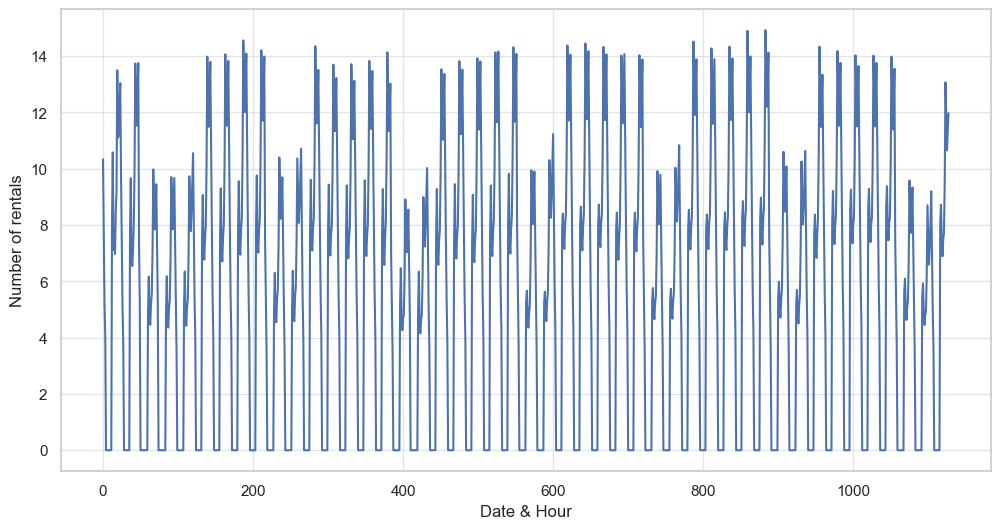

In [66]:
plt.figure(figsize=(12, 6))  # Adjust width as needed
forecast_series = pd.Series(forecast_inv.flatten())
forecast_series.plot()
plt.xlabel('Date & Hour')
plt.ylabel('Number of rentals')
plt.grid(alpha=0.5)
plt.show()

In [40]:
def retrieve_forecast(search_datetime):
    return_forecast = weather_noscale[weather_noscale.index.astype(str).str.contains(search_datetime)]
    return return_forecast


In [41]:
search_datetime = input("Retrieve forecast for desired date and hour [yyyy-mm-dd hh]\n"
                        "Search for a full year, a full month, or a full day by leaving out the succeeding values.\n"
                        "e.g. 2024-01-02 full a full day, or 2024-01 for a full month.\n").strip()
retrieve_forecast(search_datetime)

Retrieve forecast for desired date and hour [yyyy-mm-dd hh]
Search for a full year, a full month, or a full day by leaving out the succeeding values.
e.g. 2024-01-02 full a full day, or 2024-01 for a full month.
2024-02


,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,wind_speed_kmh,is_day,is_business_day,rental_prediction
hour,,,,,,,,
2024-02-01 00:00:00,21.3,21.0,18.4,0.0,3.3,1,1,8.0
2024-02-01 01:00:00,19.5,26.0,15.4,0.0,13.0,0,1,4.0
2024-02-01 02:00:00,18.6,29.0,16.2,0.0,2.5,0,1,3.0
2024-02-01 03:00:00,17.0,40.0,13.6,0.0,12.3,0,1,3.0
2024-02-01 04:00:00,14.8,53.0,12.9,0.0,5.0,0,1,4.0
...,...,...,...,...,...,...,...,...
2024-02-29 19:00:00,25.0,19.0,25.0,0.0,5.4,1,1,5.0
2024-02-29 20:00:00,26.6,14.0,26.2,0.0,4.7,1,1,5.0
2024-02-29 21:00:00,27.7,9.0,25.9,0.0,6.1,1,1,4.0
